# Fake news detection using ML 

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle
import nltk

In [71]:
df_fake = pd.read_csv("Fake-News-Detection-using-Machine-Learning-master/data/Fake.csv")
df_true = pd.read_csv("Fake-News-Detection-using-Machine-Learning-master/data/True.csv")
#df_new = pd.read_csv("Fake-News-Detection-using-Machine-Learning-master/data/train.csv")

In [72]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [73]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [74]:
df_fake["label"] = 0
df_true["label"] = 1

In [75]:
df_fake.shape, df_true.shape, #df_new.shape

((23481, 5), (21417, 5))

In [76]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480, 23470, -1):
    df_fake.drop([i], axis = 0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416 , 21406 ,-1):
    df_true.drop([i], axis = 0, inplace=True)

In [77]:
df_fake.shape, df_true.shape, #df_new.shape

((23471, 5), (21407, 5))

In [78]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [79]:
df_marge = pd.concat([df_fake, df_true,], axis =0 )
df_marge.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [80]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [81]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [85]:
df.head(10)

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [86]:
df = df.sample(frac = 1)

In [87]:
df.head(10)

,text,label
15190,Somebody doesn t like a certain person affecti...,0
2347,MOSCOW (Reuters) - Russia may impose counter-m...,1
16487,Remember when this would seem like a far-fetch...,0
2611,BRUSSELS (Reuters) - The European Union sounde...,1
8646,When one searches for the perfect way to descr...,0
6093,"An elderly, disabled couple in New Hampshire i...",0
5933,LIMA (Reuters) - Peru and Colombia vowed to st...,1
16849,"Not everyone is moving for the same reason, bu...",0
7719,BOSTON (Reuters) - The exceptionally negative ...,1
9912,The sympathetic (and borderline communist) wom...,0


In [88]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [89]:
df.shape

(44878, 2)

In [90]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [91]:
df["text"] = df["text"].apply(word_drop)

In [93]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
df.head(10)

,text,label
15190,somebody like certain person affecting ratings...,0
2347,moscow reuters russia may impose counter measu...,1
16487,remember would seem like far fetched idea demo...,0
2611,brussels reuters european union sounded alarm ...,1
8646,one searches perfect way describe supporters d...,0
6093,elderly disabled couple new hampshire sufferin...,0
5933,lima reuters peru colombia vowed stand mexico ...,1
16849,everyone moving reason one thing clear results...,0
7719,boston reuters exceptionally negative tone yea...,1
9912,sympathetic borderline communist women view ha...,0


In [95]:
x = df["text"]
y = df["label"]

# SPLITTING THE DATASET

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [138]:
len(xv_train.toarray()[0])

73894

In [139]:
results = set()
df['text'].str.lower().str.split().apply(results.update)

15190    None
2347     None
16487    None
2611     None
8646     None
         ... 
8231     None
10352    None
4710     None
7313     None
11044    None
Name: text, Length: 44878, dtype: object

In [99]:
for i in (xv_train.toarray()[0]):
    if(i > 0):
        print(i)

0.055832914292406215
0.11240597210414162
0.05581287312850986
0.0758674748236361
0.05062391140776172
0.05734187713164951
0.1161160600309762
0.03283967137220357
0.05879620617709226
0.059232546838648543
0.0660575254088652
0.08063092236433556
0.05832538877975584
0.0587709930969756
0.06549389176836234
0.07261586968087644
0.05539904661719694
0.05727441497412494
0.05685515950614504
0.03241179446689582
0.48378553418601333
0.07726846967366345
0.04216914822924621
0.08223594392936664
0.08642080275887642
0.04020003039149285
0.05718501089772329
0.10952820433562485
0.06324195232141559
0.06765987750184686
0.07451818056787936
0.1161160600309762
0.027732581672665204
0.10346680893628063
0.05243237719689911
0.07605853737556374
0.12505522319883722
0.049049985320053086
0.09265530795700479
0.05887214252821466
0.0758674748236361
0.05505460959453542
0.07726846967366345
0.07298970705511933
0.03875085641351615
0.07884042004534034
0.04819028329073309
0.05782425965799322
0.029500792511826968
0.04472083975718054
0

label
0    23471
1    21407
Name: text, dtype: int64


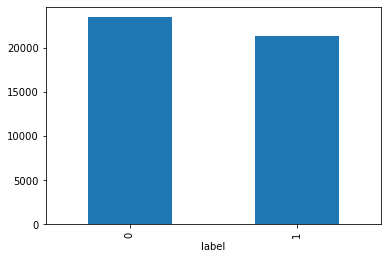

In [100]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [101]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

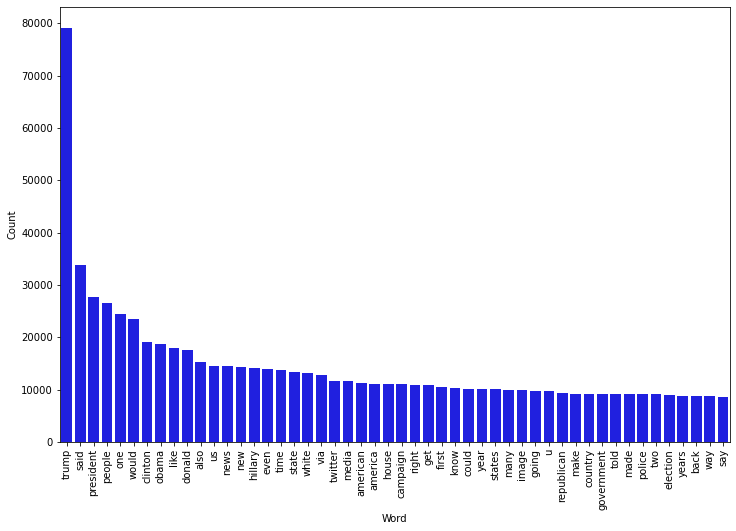

In [134]:
# Most frequent words in fake news
counter(df[df["label"] == 0], "text", 50)

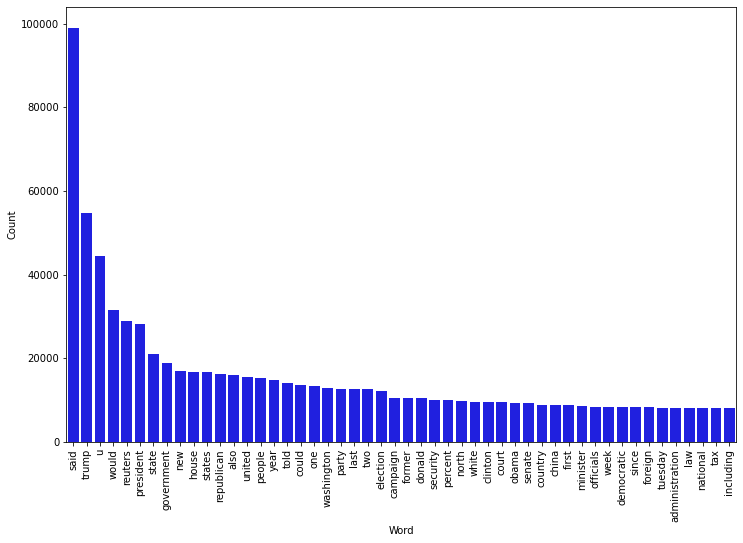

In [135]:
# Most frequent words in real news
counter(df[df["label"] == 1], "text", 50)

# 1. Logistic Regression


In [104]:
from sklearn.linear_model import LogisticRegression

In [106]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [107]:
LR.score(xv_test, y_test)

0.9826196754187247

In [108]:
LR.score(xv_test, y_test)

0.9826196754187247

In [109]:
pred_lr=LR.predict(xv_test)

In [110]:
pickle.dump(LR, open('Logistic Regression_model.pkl','wb'))

In [111]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13999
           1       0.98      0.98      0.98     12928

    accuracy                           0.98     26927
   macro avg       0.98      0.98      0.98     26927
weighted avg       0.98      0.98      0.98     26927



In [112]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


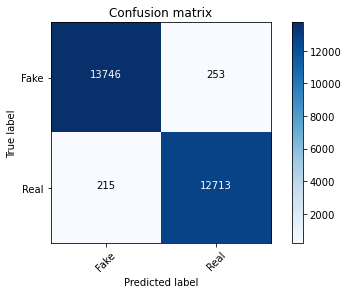

In [113]:
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# 2 Decision Tree Classification


In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [116]:
DT.score(xv_test, y_test)

0.9938351840160434

In [117]:
pickle.dump(DT, open('Decision Tree Classification_model.pkl','wb'))

In [118]:
pred_dt = DT.predict(xv_test)

In [119]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13999
           1       0.99      0.99      0.99     12928

    accuracy                           0.99     26927
   macro avg       0.99      0.99      0.99     26927
weighted avg       0.99      0.99      0.99     26927



Confusion matrix, without normalization


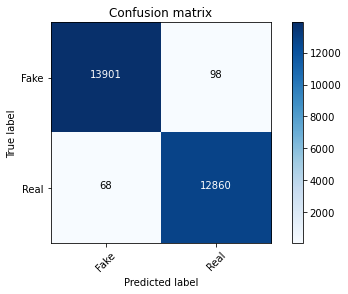

In [120]:
cm = metrics.confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### 3 Gradient Boosting Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [123]:
GBC.score(xv_test, y_test)

0.9949493073866379

In [124]:
pred_gbc = GBC.predict(xv_test)
pickle.dump(GBC, open('Gradient Boosting Classifier_model.pkl','wb'))

In [125]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13999
           1       0.99      1.00      0.99     12928

    accuracy                           0.99     26927
   macro avg       0.99      1.00      0.99     26927
weighted avg       0.99      0.99      0.99     26927



Confusion matrix, without normalization


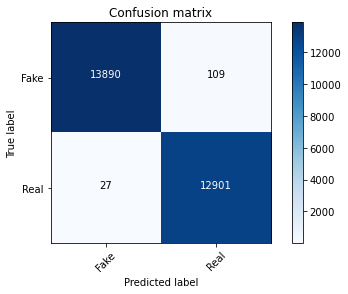

In [126]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# 4 Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [129]:
RFC.score(xv_test, y_test)

0.9900843020017083

In [130]:
pred_rfc = RFC.predict(xv_test)
pickle.dump(GBC, open('Random Forest Classifier_model.pkl','wb'))

In [131]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13999
           1       0.99      0.99      0.99     12928

    accuracy                           0.99     26927
   macro avg       0.99      0.99      0.99     26927
weighted avg       0.99      0.99      0.99     26927



Confusion matrix, without normalization


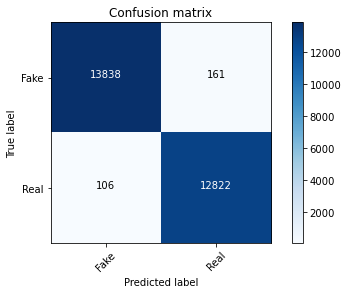

In [132]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#  Manual Testing

In [54]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:
news = str(input())
manual_testing(news)

In [ ]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
	cv_results = model_selection.cross_val_score(model,xv_train,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()